# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
#request url and print JSON
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Building a query 
query_url = f"{url}appid={api_key}&units={units}&q="

#Set up a list to hold variables
Temperature = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Latitude = []
Longitute = []

#Loop through the api to find variables above
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        Temperature.append(response['main']['temp'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Latitude.append(response['coord']['lat'])
        Longitute.append(response['coord']['lon'])
    
        print(f"Retriving Data for {city}")
    except:
        print(f"Skipping {city}")


Retriving Data for tuktoyaktuk
Retriving Data for tasiilaq
Retriving Data for esperance
Retriving Data for hilo
Retriving Data for ridge
Retriving Data for rikitea
Retriving Data for dikson
Retriving Data for sao joao da barra
Retriving Data for lompoc
Retriving Data for cape town
Retriving Data for atuona
Retriving Data for lavrentiya
Retriving Data for saint-augustin
Retriving Data for mataura
Retriving Data for cabo san lucas
Retriving Data for busselton
Retriving Data for vila velha
Retriving Data for richards bay
Retriving Data for clyde river
Retriving Data for paita
Skipping rungata
Retriving Data for lulea
Retriving Data for ambon
Retriving Data for vaini
Retriving Data for kapaa
Retriving Data for guiratinga
Retriving Data for ahipara
Retriving Data for barrow
Retriving Data for albany
Retriving Data for newport
Retriving Data for ushuaia
Retriving Data for sarany
Retriving Data for katsuura
Skipping taolanaro
Retriving Data for tura
Skipping piryion
Retriving Data for jamesto

Skipping asau
Retriving Data for pangai
Retriving Data for severo-kurilsk
Retriving Data for kholm-zhirkovskiy
Retriving Data for port-cartier
Retriving Data for itarema
Retriving Data for mina
Retriving Data for swellendam
Retriving Data for timmins
Retriving Data for hammerfest
Retriving Data for insar
Retriving Data for jarvenpaa
Retriving Data for birao
Retriving Data for muravlenko
Skipping falealupo
Retriving Data for le port
Retriving Data for hanting
Retriving Data for ulcinj
Retriving Data for seddon
Retriving Data for boden
Retriving Data for sao felix do xingu
Retriving Data for san patricio
Retriving Data for kudahuvadhoo
Retriving Data for sabinas
Retriving Data for praia
Retriving Data for nueva loja
Retriving Data for avarua
Skipping vaitupu
Retriving Data for olinda
Retriving Data for macae
Retriving Data for avera
Retriving Data for novikovo
Retriving Data for nanchong
Retriving Data for novopskov
Retriving Data for cheyenne
Retriving Data for meridian
Retriving Data f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Use the loop and information above to create a dataframe 
city_weather = ({"Temperature": Temperature,
                 "Humidity": Humidity,
                 "Cloudiness": Cloudiness,
                 "Wind Speed": Wind_Speed,
                 "Latitude": Latitude,
                 "Longitute": Longitute,})

city_weather = pd.DataFrame(city_weather)
city_weather.head()

,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitute
0,8.00,70,75,5.1,69.44,-133.03
1,6.00,93,100,2.6,65.61,-37.64
2,7.00,100,75,7.7,-33.86,121.89
3,24.17,69,90,4.1,19.71,-155.08
4,14.77,72,0,5.1,50.68,-2.09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

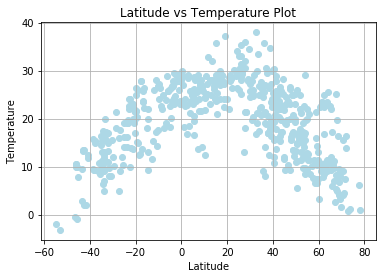

In [42]:
plt.scatter(city_weather["Latitude"], city_weather["Temperature"], marker="o", color="lightblue",)
plt.title("Latitude vs Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

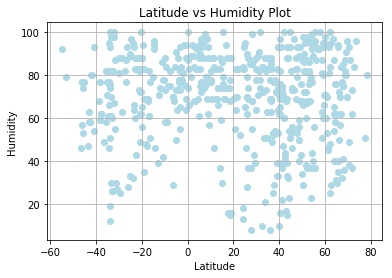

In [55]:
plt.scatter(city_weather["Latitude"], city_weather["Humidity"], marker="o", color="lightblue",)
plt.title("Latitude vs Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

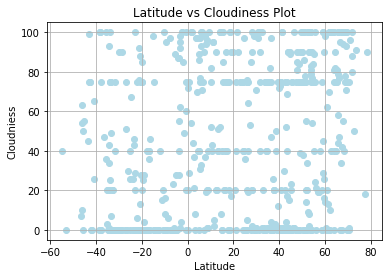

In [54]:
plt.scatter(city_weather["Latitude"], city_weather["Cloudiness"], marker="o", color="lightblue",)
plt.title("Latitude vs Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudniess")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

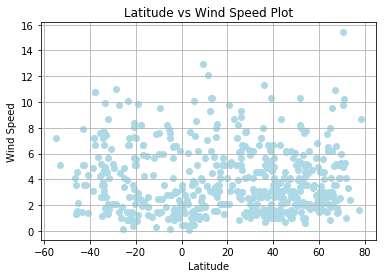

In [53]:
plt.scatter(city_weather["Latitude"], city_weather["Wind Speed"], marker="o", color="lightblue",)
plt.title("Latitude vs Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()